# Portfolio Metrics Calculator
You're given daily returns for 3 stocks and a set of portfolio weights. Write functions to calculate:

- Portfolio daily return
- Portfolio volatility (annualized)
- Sharpe ratio (assume risk-free rate = 2% annual)

Then create a visualization comparing the portfolio to individual stocks.

**Question 1: Portfolio Return**

If you have 3 stocks with weights [0.4, 0.35, 0.25] and today's returns are [0.01, -0.005, 0.02], what's the portfolio return for today?

In [57]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Portfolio Return = (w1 * r1) + (w2 * r2) + (w3 * r3)
pr = (0.4 * 0.01) + (0.35 * -0.005) + (0.25 * 0.02)

print(f"Portfolio Return for Today: {pr}")

Portfolio Return for Today: 0.00725


**Question 2: Covariances for 3 Stocks**

Portfolio volatility uses a covariance matrix. From last week, you know Var(X) and Cov(X,Y). How many variances and covariances do you need for a 3-stock portfolio?

For 3 stocks (A, B, C), there would be:
- 3 variances = Var(A), Var(B), Var(C)
- 3 covariances = (Cov(A,B), Cov(A,C), Cov(B,C))

**Question 3: Sharpe Ratio**

What does Sharpe ratio measure? (in plain English)

Sharpe Ratio = (Return - Risk-Free Rate) / Volatility
It basically solves the question: "how much extra return am I getting per unit of risk I'm taking?"

Example:
- Portfolio returns 8% per year
- Risk-free rate is 2% per year
- Portfolio volatility is 12%

Sharpe Ratio = (0.08 - 0.02) / 0.12 = 0.5

This means that for every 1% of risk (volatility), you are earning 0.5% excess return above the risk-free rate.

Higher Sharpe = Better (given it signals more return per unit of risk)

In [44]:
# code form
sr = (0.08 - 0.02) / 0.12

print(f"Sharpe Ratio: {sr}")

Sharpe Ratio: 0.5


## Portfolio Calculator Setup

In [79]:
# Generate 252 days of returns for 3 stocks
np.random.seed(42)
n_days = 252

# Stock A: tech stock (higher vol)
stock_a = np.random.normal(0.0005, 0.02, n_days)

# Stock B: stable stock (lower vol)
stock_b = np.random.normal(0.0003, 0.01, n_days)

# Stock C: correlated with A
stock_c = 0.6 * stock_a + np.random.normal(0.0004, 0.015, n_days)

# Portfolio weights
weights = np.array([0.4, 0.35, 0.25])

# Risk-free rate (annual)
rf_annual = 0.02

#### Task: Build 3 Functions
1) _calculate_portfolio_return(returns_matrix, weights)_

   Formula: What was calculated above

   Returns: Daily portfolio returns (an array)


2) _calculate_portfolio_volatility(returns_matrix, weights)_

    Formula: σ_p = √(w^T × Σ × w) where Σ is the covariance matrix

    Returns: Annualized volatility (a single number)


3) _calculate_sharpe_ratio(portfolio_returns, rf_rate)_

    Formula: What was written above

    Returns: Sharpe ratio (a single number)

##### Task 1

In [138]:
returns_matrix = np.column_stack([stock_a, stock_b, stock_c])
def calculate_portfolio_return(returns_matrix, weights):
    portfolio_returns = returns_matrix @ weights
    return portfolio_returns

portfolio_returns = calculate_portfolio_return(returns_matrix, weights)

In [136]:
# sanity check: portfolio returns
print("Portfolio Returns - Summary Statistics:")
print(f"First 3 Returns:{portfolio_returns[:3]}")
print(f"Mean: {np.mean(portfolio_returns):.6f}")
print(f"Std: {np.std(portfolio_returns):.6f}")
print(f"Min: {np.min(portfolio_returns):.6f}")
print(f"Max: {np.max(portfolio_returns):.6f}")
print(f"Any NaNs Present?: {np.isnan(portfolio_returns).any()}")

Portfolio Returns - Summary Statistics:
First 3 Returns:[1.09314927e-02 7.46000910e-04 6.53018224e-05]
Mean: 0.000239
Std: 0.012057
Min: -0.029829
Max: 0.044480
Any NaNs Present?: False


##### Task 2

_Portfolio Variance Formula:_ σ²_portfolio = w^T × Σ × w

w = weights vector [0.4, 0.35, 0.25]

Σ = covariance matrix (3x3)

w^T = weights transposed

Portfolio variance depends on how much each stock varies as well as how they move together (covariances).

_Portfolio Volatility (Standard Deviation) Formula:_ σ_portfolio = √(σ²_portfolio)

_Annualized Volatility Formula:_ σ_annual = σ_daily × √252 (where 252 = trading days per year)

lower volatility = more stable; higher volatility = more risky

In [163]:
def calculate_portfolio_volatility(returns_matrix, weights):
    # get covariance matrix
    cov_matrix = np.cov(returns_matrix.T)
    # calculate portfolio variance using W^T x Σ x w
    portfolio_variance = weights.T @ cov_matrix @ weights
    # take square root to get daily volatility
    portfolio_daily_vol = np.sqrt(portfolio_variance)
    # annualize by multiplying by √252
    annualized_vol = portfolio_daily_vol * np.sqrt(252)
    return annualized_vol

portfolio_volatility = calculate_portfolio_volatility(returns_matrix, weights)

print(f"Annualized Volatility: {portfolio_volatility*100:.2f}%")

Annualized Volatility: 19.18%


##### Task 3

Sharpe Ratio = (annual return - risk-free rate) / annual volatility

In [172]:
def calculate_sharpe_ratio(portfolio_returns, rf_annual):
    # calculate annualized return
    annualized_return = np.mean(portfolio_returns) * 252
    
    # calculate annualized volatility
    annualized_volatility = np.std(portfolio_returns) * np.sqrt(252)
    
    # calculate excess return
    excess_return = annualized_return - rf_annual
    
    # calculate Sharpe ratio
    sharpe_ratio = excess_return / annualized_volatility
    
    return sharpe_ratio

sharpe = calculate_sharpe_ratio(portfolio_returns, rf_annual)
print(f"Sharpe Ratio: {sharpe:.3f}")

Sharpe Ratio: 0.210


In [176]:
print(f"\nSanity Check Breakdown:")
print(f"Annualized Return: {np.mean(portfolio_returns)*252*100:.2f}%")
print(f"Risk-Free Rate: {rf_annual*100:.2f}%")
print(f"Annualized Volatility: {np.std(portfolio_returns)*np.sqrt(252)*100:.2f}%")
print(f"Excess Return: {(np.mean(portfolio_returns)*252 - rf_annual)*100:.2f}%")


Sanity Check Breakdown:
Annualized Return: 6.03%
Risk-Free Rate: 2.00%
Annualized Volatility: 19.14%
Excess Return: 4.03%


**Explanation Per Task**

_Task 1:_ The output numbers are the daily portfolio returns for each of the 252 trading days (day 1: 1.09% return, day 2: 0.0746% return, day 3: 0.00653% return).

_Task 2:_ This portfolio returns typically vary by about ±19% per year. This accounts for both the individual volatility of each stock and how they move together (correlations).

_Task 3:_ For every 1% of volatility (risk) you take, you earn 0.21% of excess return above the risk-free rate. This can be considered a modest, not great, return.

In conclusion, this portfolio earns 6% annually, but has a 19% volatility.

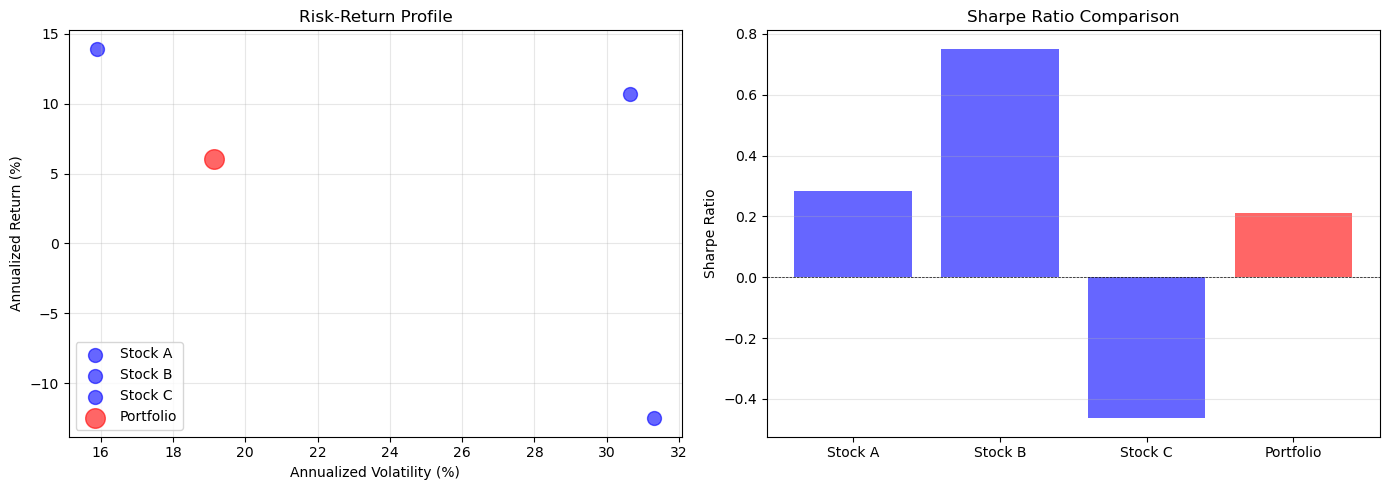

PORTFOLIO SUMMARY
Stock A      | Return:  10.70% | Vol:  30.65% | Sharpe: 0.284
Stock B      | Return:  13.93% | Vol:  15.88% | Sharpe: 0.751
Stock C      | Return: -12.52% | Vol:  31.31% | Sharpe: -0.464
Portfolio    | Return:   6.03% | Vol:  19.14% | Sharpe: 0.210


In [189]:
# calculate metrics for each individual stock - comparison purposes
stocks = {
    'Stock A': stock_a,
    'Stock B': stock_b,
    'Stock C': stock_c,
    'Portfolio': portfolio_returns
}

metrics = {}
for name, returns in stocks.items():
    ann_return = np.mean(returns) * 252 * 100
    ann_vol = np.std(returns) * np.sqrt(252) * 100
    sharpe = (np.mean(returns) * 252 - rf_annual) / (np.std(returns) * np.sqrt(252))
    metrics[name] = {'return': ann_return, 'vol': ann_vol, 'sharpe': sharpe}

# develop scatter plot: Risk vs Return - risk-return tradeoff
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Risk-Return scatter
for name, vals in metrics.items():
    color = 'red' if name == 'Portfolio' else 'blue'
    size = 200 if name == 'Portfolio' else 100
    ax1.scatter(vals['vol'], vals['return'], s=size, alpha=0.6, color=color, label=name)
    
ax1.set_xlabel('Annualized Volatility (%)')
ax1.set_ylabel('Annualized Return (%)')
ax1.set_title('Risk-Return Profile')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Sharpe Ratio Comparison - shows which assets have better risk-adjusted returns
names = list(metrics.keys())
sharpes = [metrics[n]['sharpe'] for n in names]
colors = ['red' if n == 'Portfolio' else 'blue' for n in names]

ax2.bar(names, sharpes, color=colors, alpha=0.6)
ax2.set_ylabel('Sharpe Ratio')
ax2.set_title('Sharpe Ratio Comparison')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# official summary table

print("PORTFOLIO SUMMARY")
print("="*60)
for name, vals in metrics.items():
    print(f"{name:12} | Return: {vals['return']:6.2f}% | Vol: {vals['vol']:6.2f}% | Sharpe: {vals['sharpe']:5.3f}")

### Key Takeaways & Insights

Portfolio Performance Summary:
- Annualized Return: 6.03% (modest positive return)
- Annualized Volatility: 19.14% (moderate risk)
- Sharpe Ratio: 0.210 (fair risk-adjusted return)

Diversification Benefits:
- Stock C has negative return (-12.52%) but we still allocated 25%
- Portfolio volatility (19.14%) is LOWER than Stock A (30.65%) and Stock C (31.31%)
- This demonstrates how diversification reduces risk even with poorly performing assets

Next Steps to Improve Portfolio:
- Optimize weights to maximize Sharpe ratio
- Add more low-correlation assets
- Implement risk constraints (max position size, sector limits)
- Test different rebalancing frequencies